In [3]:
from nilearn import plotting as plt
import matplotlib.pyplot as mlplt

import seaborn as sns
import matplotlib as ml
import numpy as np
import random

from neurosynth.base import imageutils
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("../data/datasets/abs_60topics_filt_jul.pkl")
from base.plotting import nine_colors
import nibabel as nib

In [17]:
posterior = [3, 6]
middle = [1, 5, 7, 9]
anterior = [2, 4, 8]

In [105]:
three_file = '../results/clustering/results/MFC/MF/kmeans_k3/cluster_labels.nii.gz'
nine_file = '../results/clustering/results/MFC/MF/kmeans_k9/cluster_labels.nii.gz'

# Figure 3 - Co-activation contrast

In [19]:
def mask_level(path, level):
    img = nib.load(path)
    data = img.get_data()
    data[:] = np.round(data)
    data[data != level] = 0 
    data[data == level] = 1
    
    return img

In [96]:
def coactivation_contrast(dataset, infile, regions=None, target_thresh=0.03, 
                          other_thresh=0.01, stat="pFgA_z_FDR_0.01"):
    """ Performs meta-analyses to contrast co-activation in a target region vs
    co-activation of other regions. Contrasts every region in "regions" vs
    the other regions in "regions"
    
    dataset: Neurosynth dataset
    infile: Nifti file with masks as levels
    regions: which regions in image to contrast
    target_thresh: activaton threshold for retrieving ids for target region
    other_thresh: activation threshold for ids in other regions
                  - This should be proportionally lower than target thresh since
                    multiple regions are being contrasted to one, and thus should de-weighed
    stat: which image to return from meta-analyis. Default is usually correct
    
    returns: a list of nifti images for each contrast performed of length = len(regions) """
      
    affine = nib.load(infile).get_affine()
        
    meta_analyses = []
    for reg in regions:
        other_ids = [dataset.get_studies(mask=mask_level(infile, a), activation_threshold=other_thresh)
                         for a in regions if a != reg]
        joined_ids = set()
        for ids in other_ids:
            joined_ids = joined_ids | set(ids)

        reg_ids = dataset.get_studies(mask=mask_level(infile, reg), activation_threshold=target_thresh)
        meta_analyses.append(meta.MetaAnalysis(dataset, reg_ids, ids2=list(joined_ids)))
        
    return [nib.nifti1.Nifti1Image(dataset.masker.unmask(
                ma.images[stat]), affine, dataset.masker.get_header()) for ma in meta_analyses]

In [98]:
def make_thresholded_axials(regions, colors, overplot=True, binarize=True, **kwargs):
    """ Plots on axial slices numerous images
    regions: Nibabel images
    colors: List of colors (rgb tuples)
    overplot: Overlay images?
    binarize: Binarize images or plot full stat maps
    """             
    if binarize:
        for reg in regions:
             reg.get_data()[reg.get_data().nonzero()] = 1
                                   
    for i, reg in enumerate(regions):
        reg_color = ml.colors.LinearSegmentedColormap.from_list('reg1', [colors[i], colors[i]])
        if i == 0:
            plot = plt.plot_stat_map(reg, draw_cross=False,  display_mode='z', cmap = reg_color, alpha=0.9, colorbar=False, **kwargs)
        else:
            if overplot:
                plot.add_overlay(reg, cmap = reg_color, alpha=.72)
            else:
                plt.plot_stat_map(reg, draw_cross=False,  display_mode='z', cmap = reg_color, colorbar=False, **kwargs)
    
    return plot

In [94]:
cut_coords = np.arange(-15, 60, 12)

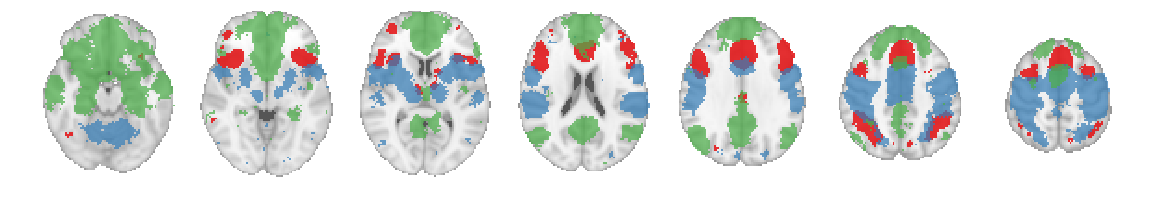

In [106]:
contrast_mas = region_set_coactivation_contrast(
    dataset, three_file, [1, 2, 3])
make_thresholded_axials(contrast_mas, sns.color_palette('Set1', 3), 
                       cut_coords=cut_coords, annotate=False)
# mlplt.savefig('../reports/papers/mFC/3_parcels_ri_coactivation.png',bbox_inches='tight')

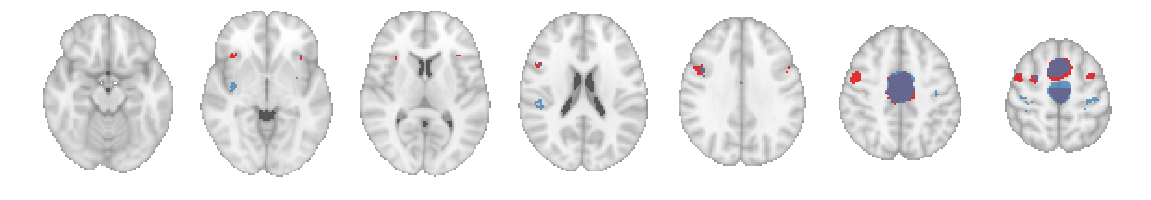

In [107]:
contrast_mas = region_set_coactivation_contrast(
    dataset, nine_file, posterior)
make_thresholded_axials(contrast_mas, sns.color_palette('Set1', 2), 
                       cut_coords=cut_coords, annotate=False)

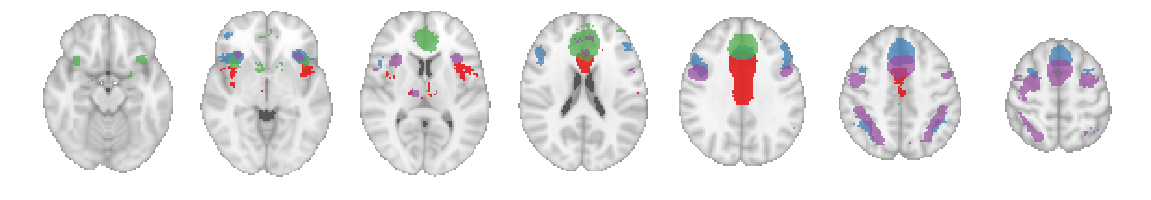

In [108]:
contrast_mas = region_set_coactivation_contrast(
    dataset, nine_file, middle)
make_thresholded_axials(contrast_mas, sns.color_palette('Set1', 4), 
                       cut_coords=cut_coords, annotate=False)

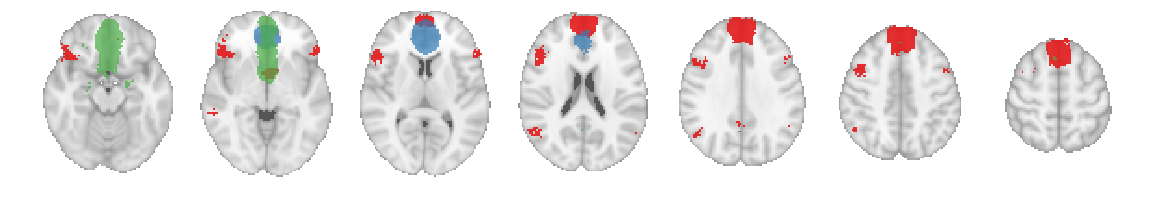

In [109]:
contrast_mas = region_set_coactivation_contrast(
    dataset, nine_file, anterior)
make_thresholded_axials(contrast_mas, sns.color_palette('Set1', 3), 
                       cut_coords=cut_coords, annotate=False)

# Figure 2 - Clusters

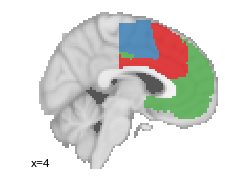

In [110]:
colors = sns.color_palette('Set1', 3)
plt.plot_roi(three_file, cut_coords=[4], display_mode='x', 
             draw_cross=False, cmap = ml.colors.ListedColormap(colors), alpha=0.8)

# mlplt.savefig('../reports/papers/mFC/parcellation/3.pdf')

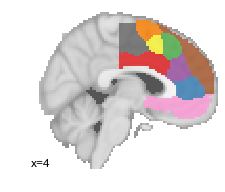

In [112]:
from base.plotting import nine_colors
plt.plot_roi(nine_file, cut_coords=[4], display_mode='x', 
             draw_cross=False, cmap = ml.colors.ListedColormap(nine_colors), alpha=0.8)

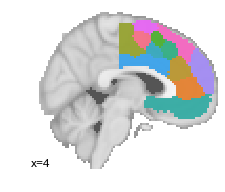

In [117]:
from random import shuffle
colors = sns.color_palette("husl", 12)
shuffle(colors)
plt.plot_roi('../results/clustering/results/MFC/MF/kmeans_k12/cluster_labels.nii.gz', cut_coords=[4], display_mode='x', draw_cross=False, 
             cmap = ml.colors.ListedColormap(colors), alpha=0.95)
mlplt.savefig('../reports/MFC/mFC_Shared/Figures/clustering_15_regions_1.png')


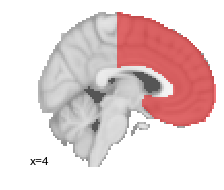

In [20]:
plt.plot_roi('../masks/new_medial_fc_30.nii.gz', cut_coords=[4], draw_cross=False, display_mode='x',  cmap = ml.colors.ListedColormap(colors_12[5]), alpha=0.6)
# mlplt.savefig('../reports/vmpfc_comps/parcellation/ROI.jpeg', bbox_inches='tight')

In [22]:
def calculate_overlap(data):
    # Binarize
    data[data > 0] = 1

    overlap = np.zeros((data.shape[1],data.shape[1]) )
    for comb in itertools.combinations(np.arange(0, data.shape[1]), 2):
        subset = data[:, comb]

        overlap[comb] =  (subset.sum(axis=1) == 2).sum()
    return overlap

In [23]:
calculate_overlap(three_thresh)

NameError: name 'three_thresh' is not defined

In [24]:
sns.heatmap(calculate_overlap(nine_thresh))

NameError: name 'nine_thresh' is not defined

In [25]:
imageutils.save_img(overlap, 'overlap.nii.gz', dataset.masker)

NameError: name 'overlap' is not defined

/usr/local/lib/python2.7/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


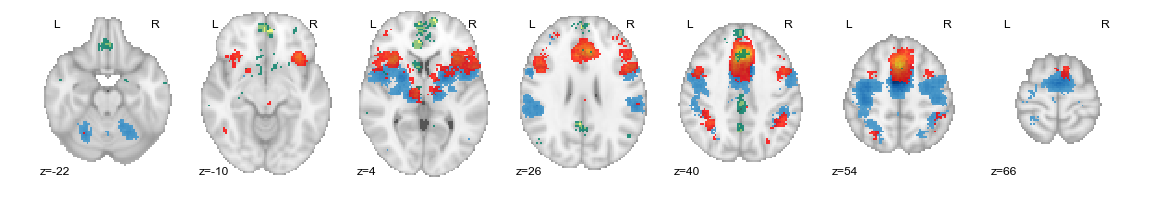

In [26]:
plot = plt.plot_stat_map('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_2_pAgF_z_FDR_0.01.nii.gz', draw_cross=False,  display_mode='z',
                         cmap = 'Blues', colorbar=False)
plot.add_overlay('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_1_pAgF_z_FDR_0.01.nii.gz', 
                cmap ="autumn", alpha=.8)
plot.add_overlay('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_3_pAgF_z_FDR_0.01.nii.gz', 
                cmap ="summer", alpha=.8)
# mlplt.savefig('../reports/vmpfc_comps/three_clust_coact_axial.jpeg', bbox_inches='tight')

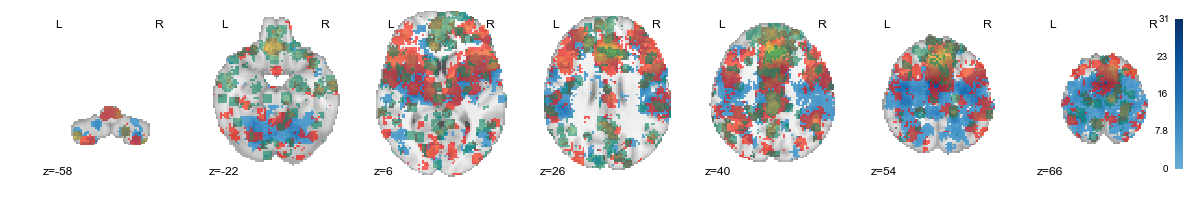

In [117]:
plot = plt.plot_stat_map('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_2_pFgA_z_FDR_0.01.nii.gz', draw_cross=False,  display_mode='z',
                         cmap = 'Blues', colorbar=True)
plot.add_overlay('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_1_pFgA_z_FDR_0.01.nii.gz', 
                cmap ="autumn", alpha=.6)
plot.add_overlay('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_3_pFgA_z_FDR_0.01.nii.gz', 
                cmap ="summer", alpha=.6)

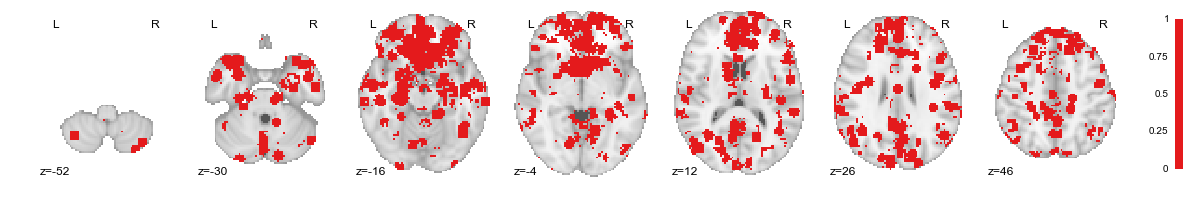

In [79]:
plot = plt.plot_stat_map(c3, draw_cross=False,  display_mode='z',
                         cmap = ml.colors.LinearSegmentedColormap.from_list('reg1', [nine_colors[0], nine_colors[0]]), colorbar=True)

In [85]:
nine_colors = [(0.89411765336990356, 0.10196078568696976, 0.10980392247438431),
 (0.65845446095747107, 0.34122261685483596, 0.1707958535236471),
   (1.0, 0.50591311045721465, 0.0031372549487095253),
 (0.21602460800432691, 0.49487120380588606, 0.71987698697576341),
 (0.30426760128900115, 0.68329106055054012, 0.29293349969620797),
               (0.400002384185791, 0.4000002384185791, 0.40000002384185791), 

 (0.60083047361934883, 0.30814303335021526, 0.63169552298153153),
       
               (0.99850826852461868, 0.45846600392285513, 0.9992888871361229),
    (0.9915647868549117, 0.9870049982678657, 0.19915417450315812)
 
 ]

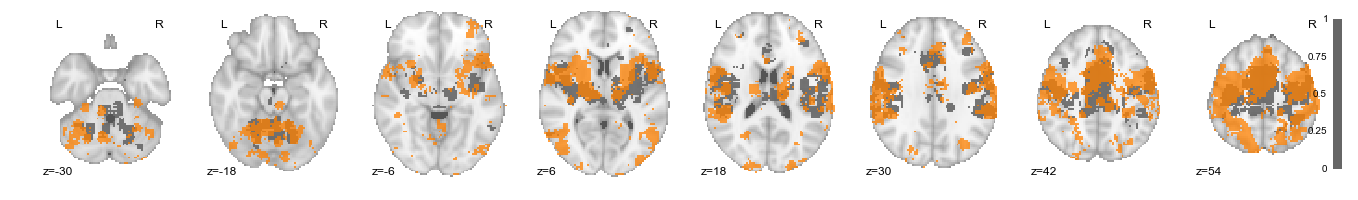

In [105]:
make_thresholded_axials('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/new_meta/', [SMA[-1],SMA[0]], 
                        nine_colors, overplot=True, cut_coords=np.arange(-30, 62, 12))

In [127]:
preSMA

[1, 5, 7, 9]

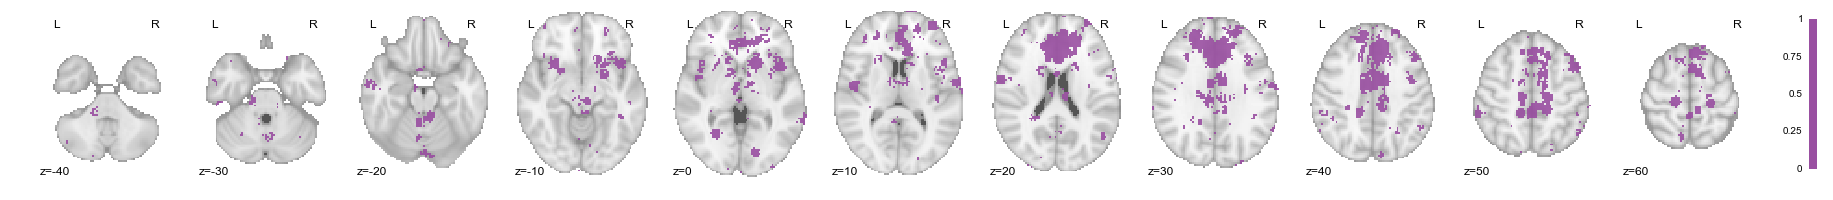

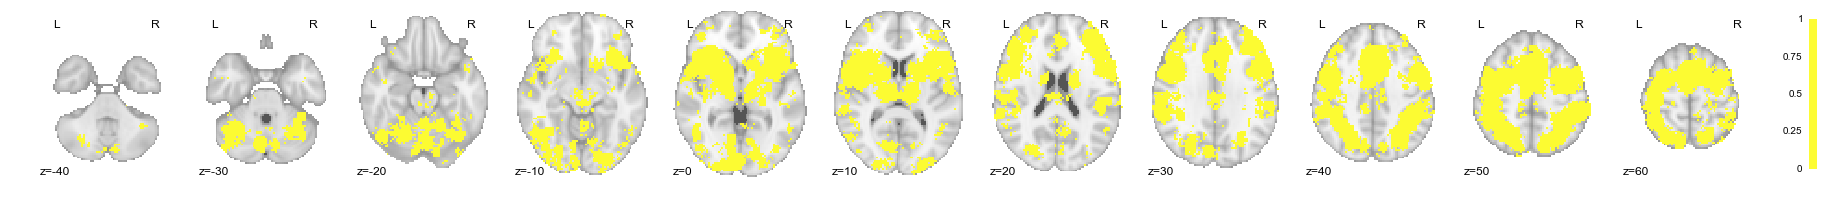

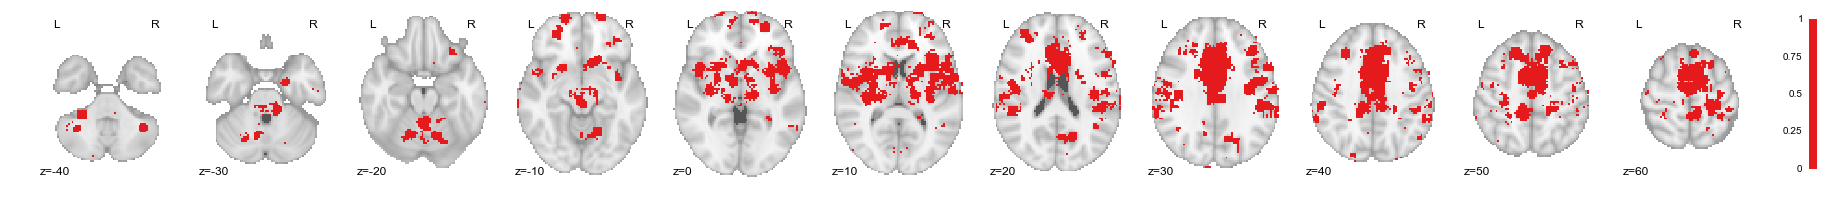

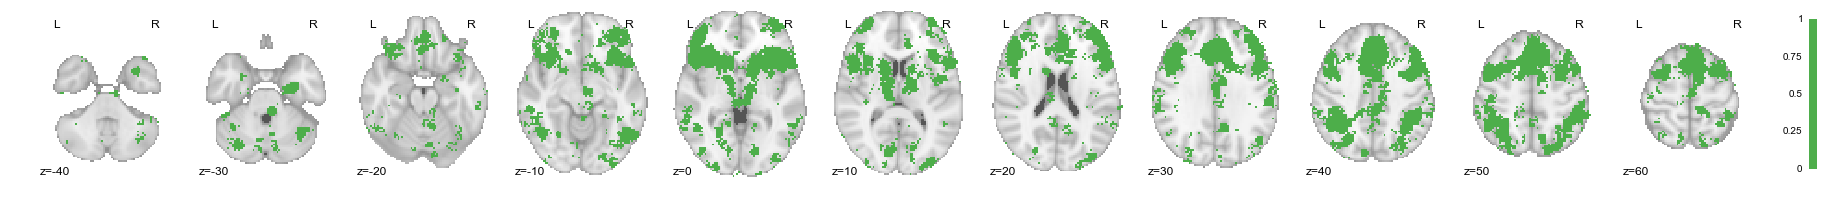

In [126]:
make_thresholded_axials('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/new_meta/', preSMA[2:] + preSMA[0:2], 
                        nine_colors, overplot=False, cut_coords=np.arange(-40, 62, 10))

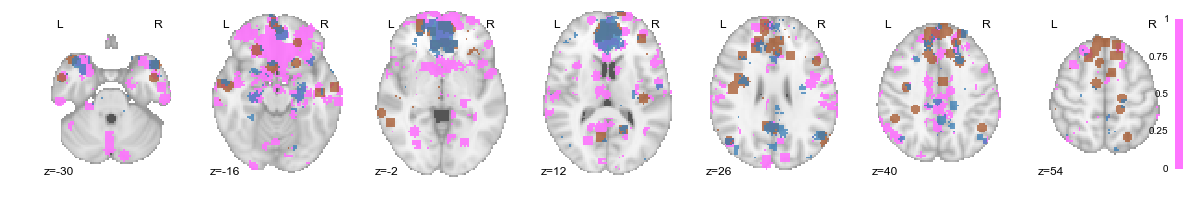

In [107]:
make_thresholded_axials('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/new_meta/', [mPFC[-1]] + mPFC[:-1], nine_colors, 
                        overplot=True, cut_coords=np.arange(-30, 62, 14))

In [29]:
mPFC

[2, 4, 8]

In [109]:
preSMA

[1, 5, 7, 9]

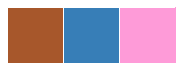

In [97]:
sns.palplot([nine_colors[c-1] for c in mPFC])

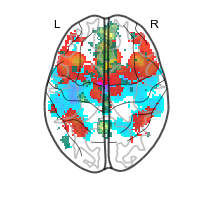

In [101]:
plot = plt.plot_glass_brain('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_2_pAgF_z_FDR_0.01.nii.gz', draw_cross=False,  display_mode='z',
                         cmap = 'cool', colorbar=False)
plot.add_overlay('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_1_pAgF_z_FDR_0.01.nii.gz', 
                cmap ="autumn", alpha=.8)
plot.add_overlay('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_3_pAgF_z_FDR_0.01.nii.gz', 
                cmap ="summer", alpha=.8)

In [ ]:
plot = plt.plot_glass_brain('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_2_pAgF_z_FDR_0.01.nii.gz', draw_cross=False,
                         cmap = 'cool', colorbar=False)
plot.add_overlay('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_1_pAgF_z_FDR_0.01.nii.gz', 
                cmap ="autumn", alpha=.8)
plot.add_overlay('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_3_pAgF_z_FDR_0.01.nii.gz', 
                cmap ="summer", alpha=.8)
mlplt.savefig('../reports/vmpfc_comps/three_clust_coact_glass.jpeg', bbox_inches='tight')

In [ ]:
plt.plot_stat_map('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/coactivation/cluster_9_pAgF_z_FDR_0.01.nii.gz', threshold=4)

In [ ]:
preSMAimgs = [nib.load('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/coactivation/cluster_' + str(i) + '_pAgF_z_FDR_0.01.nii.gz') for i in preSMA]
preSMAimgsdata = [d.get_data() for d in preSMAimgs]
for img in preSMAimgsdata:
    img[img < 0] = 0

In [ ]:
plot = plt.plot_stat_map(preSMAimgs[0], draw_cross=False,
                         cmap = 'Blues')
plot.add_overlay(preSMAimgs[1], 
                cmap ="autumn", alpha=.8)
plot.add_overlay(preSMAimgs[2], 
                cmap ="summer", alpha=.8)
plot.add_overlay(preSMAimgs[3] ,
                cmap ="hot", alpha=.8)

In [ ]:
plot = plt.plot_glass_brain(preSMAimgs[0], draw_cross=False,
                         cmap = 'Blues',threshold=10)
plot.add_overlay(preSMAimgs[1], 
                cmap ="autumn", alpha=.8, threshold=10)
plot.add_overlay(preSMAimgs[2], 
                cmap ="summer", alpha=.8, threshold=10)
plot.add_overlay(preSMAimgs[3] ,
                cmap ="cool", alpha=.8, threshold=10)

In [ ]:
plot = plt.plot_glass_brain('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_1_pAgF_z_FDR_0.01.nii.gz',  vmin=0, vmax=10)


In [34]:
from neurosynth.base import imageutils

In [37]:
img = imageutils.load_imgs('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_3_pAgF_z_FDR_0.01.nii.gz', dataset.masker)

In [ ]:
plt.plot_glass_brain('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_2_pAgF_z_FDR_0.01.nii.gz', colorbar=True, cmap='YlOrRd', vmin=0, vmax=10)
mlplt.savefig('../reports/vmpfc_comps/SMA_coact_whole_brain.jpeg', bbox_inches='tight')

In [ ]:
plt.plot_glass_brain('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/coactivation/cluster_3_pAgF_z_FDR_0.01.nii.gz', colorbar=True,  cmap='YlOrRd', vmin=0, vmax=10)
mlplt.savefig('../reports/vmpfc_comps/mPFC_coact_whole_brain.jpeg', bbox_inches='tight')

In [ ]:
threeclust = nib.load('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k3/cluster_labels.nii.gz')

In [ ]:
def plot_subset(nifti, layers, colors = None, **kwargs):    
    nibs = nib.load(nifti)
    data = nibs.get_data()

    vmax = int(np.round(data.max()))
    
    if colors is None:
        colors = sns.color_palette('Set1', vmax)
        
    # Get only relevant colors
    colors = np.array(colors)[np.array(range(layers[0], layers[-1] + 1)) - 1]
        
    for value in np.unique(np.round(data)):
        if np.in1d(value, layers)[0] == False:
            data[np.round(data) == value] = 0
    plt.plot_roi(nibs, cmap = ml.colors.ListedColormap(colors),**kwargs)

In [ ]:
## Print each individual cluster
for i in range(1, 10):
    plot_subset('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/cluster_labels.nii.gz', [i], colors = nine_colors, cut_coords=[5], draw_cross=False,  alpha=0.95, display_mode='x' )
    mlplt.savefig('../reports/papers/mFC/parcellation/9/' + str(i) + '.jpeg', bbox_inches='tight')

In [ ]:
plot_subset('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/cluster_labels.nii.gz', SMA, colors=nine_colors, cut_coords=[5], draw_cross=False,  alpha=0.95, display_mode='x' )
mlplt.savefig('../reports/papers/mFC/parcellation/9/SMA.jpeg', bbox_inches='tight')

In [ ]:
plot_subset('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/cluster_labels.nii.gz', preSMA, colors=nine_colors, cut_coords=[5], draw_cross=False,  alpha=0.95, display_mode='x' )
mlplt.savefig('../reports/papers/mFC/parcellation/9/preSMA.jpeg', bbox_inches='tight')

In [ ]:
plot_subset('../results/perm_cluster/medial_fc_30_kmeans/kmeans_k9/cluster_labels.nii.gz', mPFC, colors=nine_colors,cut_coords=[5], draw_cross=False,  alpha=0.95, display_mode='x' )
mlplt.savefig('../reports/papers/mFC/parcellation/9/mPFC.jpeg', bbox_inches='tight')

In [ ]:
plt.plot_roi('../reports/vmpfc_comps/mFC_complex_ntopics.nii', cut_coords=[5],draw_cross=False, display_mode='x', vmin = 0.5, cmap="OrRd", alpha=0.8, colorbar=True,
                  output_file="../reports/vmpfc_comps/mFC_complex_brain.jpeg")

In [ ]:
plt.plot_roi('../reports/vmpfc_comps/sdi.nii', cut_coords=[5], draw_cross=False, display_mode='x', vmin=3.25, cmap="OrRd", alpha=0.8, colorbar=True,
                  output_file="../reports/vmpfc_comps/mFC_SDI_brain.jpeg")